CAZy

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.stats import hypergeom, chi2_contingency
import upsetplot as up
import glob


In [2]:
CAZy_combined_curada = pd.read_csv("CAZy_combined_curada.tsv", sep='\t')

print(CAZy_combined_curada.head())

                     Gene ID         EC#                         HMMER  \
0  Prodigal_1070|LOCUS_09220  3.5.1.25:7                    CE9(9-385)   
1  Prodigal_1171|LOCUS_09950   2.4.1.-:1                   GT1(13-394)   
2  Prodigal_1200|LOCUS_10160           -                  GT28(55-203)   
3  Prodigal_1376|LOCUS_11370       -|-|-  CBM50(94-135)+CBM50(164-206)   
4  Prodigal_1427|LOCUS_11740           -                  CE4(125-248)   

                          dbCAN_sub  #ofTools          bin_id  \
0                           CE9_e51         3  L_maxbin_L.006   
1                          GT1_e483         3  L_maxbin_L.006   
2                          GT28_e30         2  L_maxbin_L.006   
3  CBM50_e833+CBM50_e438+CBM50_e974         3  L_maxbin_L.006   
4                          CE4_e138         2  L_maxbin_L.006   

  codigo_taxonomico codigo_MAG categoria DIAMOND HMMER_code dbCAN_sub_code  \
0   Domibacillaceae        L_3         A     CE9        CE9            CE9   
1   Domi

In [3]:
order =  ['Sporolactobacillaceae (a)', 'Domibacillaceae', 'Paenibacillaceae', 'UMGS416', 'SZUA-584', 'Latescibacterales', 
           'GWA1-39-11', 'Alkalibacteraceae', 'Balneolaceae (b)', 'RKRQ02 (b)', 'JABDQX01', 'Micropepsaceae', 'UBA5704 (b)', 
           'Woeseiaceae (a)', 'UBA6522 (c)', 'UBA6522 (b)', 'UBA6522 (a)', 'UBA5704 (c)', 'Nitrososphaeraceae (b)', 'E44-bin32 (b)', 
           'Methyloligellaceae', 'GWC2-71-9', 'UBA6522 (d)', 'Nitrososphaeraceae (a)', 'UBA4486', 'Rhodobacteraceae', 'Streptomycetaceae', 
           'Cyclobacteriaceae', 'Flavobacteriaceae', 'Cellulomonadaceae', 'SM23-39', 'Sporolactobacillaceae (b)', 'Bacillaceae_C',
           'Planctomycetaceae', 'QNYZ01', 'UBA6522 (e)', 'SG8-13 (b)', 'SG8-13 (a)', 'Desulfobacterales', 'Promineofilaceae (b)', 
           'JACQBZ02', 'SG8-38', 'Balneolaceae (a)', 'CECT-8803', 'Lacipirellulaceae', 'Pseudonocardiaceae', 'HXMU1428-3', '70-9 (a)', 
           'Promineofilaceae (a)', 'UBA8139', 'RKRQ01', 'Halobacteriales (b)', 'SZUA-232', 'J153', 'RKRQ02 (a)', 'UBA5704 (a)', 'JAENVV01',  
           'SG8-41', "Halobacteriales (a)", "Nitriliruptoraceae", "HGW-15", "ZC4RG35 (a)", "ZC4RG35 (b)", "E44-bin32 (a)", "Hyphomicrobiaceae",
           "Woeseiaceae (b)", "70-9 (b)", "UBA11606", "SZUA-229", "RKSH01", "JAFGWO01", "Jiangellales", "Anaerolineaceae", "DSSB01" ]

In [9]:
# Step 1: Group the data by 'MAG' and 'matched_code' and count occurrences
heatmap_data = CAZy_combined_curada.groupby(['codigo_taxonomico', 'matched_code']).size().unstack(fill_value=0)

heatmap_data.head()

matched_code,AA1,AA10,AA12,AA2,AA3,AA4,AA5,AA6,AA7,CBM11,...,PL10,PL11,PL12,PL14,PL38,PL39,PL42,PL6,PL8,PL9
codigo_taxonomico,,,,,,,,,,,,,,,,,,,,,
70-9 (a),0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
70-9 (b),0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Alkalibacteraceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anaerolineaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Bacillaceae_C,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
completitud=pd.read_csv('completitud.csv')

In [13]:
completitud.set_index('codigo_taxonomico', inplace=True)

In [14]:
completitud.head()

,Completeness
codigo_taxonomico,
70-9 (a),0.9612
70-9 (b),0.7069
Promineofilaceae (a),0.6737
JABDQX01,0.7771
UBA6522 (d),0.5504


In [15]:
# Find the common MAG values
common_mags = heatmap_data.index.intersection(completitud.index)

# Find the MAG values in KO matrix that are NOT in completeness data
missing_in_completeness = heatmap_data.index.difference(completitud.index)

# Print the results
if missing_in_completeness.empty:
    print("All MAG values in the KO matrix exist in the completeness data.")
else:
    print("The following MAG values are missing in the completeness data:")
    print(missing_in_completeness)

All MAG values in the KO matrix exist in the completeness data.


In [16]:
# Divide each value in the KO data by the corresponding completeness value
normalized_CAZy_data = heatmap_data.div(completitud['Completeness'], axis=0)

# Display the result
print(normalized_CAZy_data)

matched_code       AA1  AA10  AA12  AA2       AA3       AA4  AA5       AA6  \
codigo_taxonomico                                                            
70-9 (a)           0.0   0.0   0.0  0.0  0.000000  0.000000  0.0  0.000000   
70-9 (b)           0.0   0.0   0.0  0.0  1.414627  0.000000  0.0  0.000000   
Alkalibacteraceae  0.0   0.0   0.0  0.0  0.000000  0.000000  0.0  0.000000   
Anaerolineaceae    0.0   0.0   0.0  0.0  0.000000  0.000000  0.0  0.000000   
Bacillaceae_C      0.0   0.0   0.0  0.0  0.000000  1.149690  0.0  0.000000   
...                ...   ...   ...  ...       ...       ...  ...       ...   
UMGS416            0.0   0.0   0.0  0.0  0.000000  1.479071  0.0  0.000000   
Woeseiaceae (a)    0.0   0.0   0.0  0.0  0.000000  0.000000  0.0  0.000000   
Woeseiaceae (b)    0.0   0.0   0.0  0.0  0.000000  1.313198  0.0  2.626395   
ZC4RG35 (a)        0.0   0.0   0.0  0.0  0.000000  0.000000  0.0  0.000000   
ZC4RG35 (b)        0.0   0.0   0.0  0.0  1.388696  0.000000  0.0

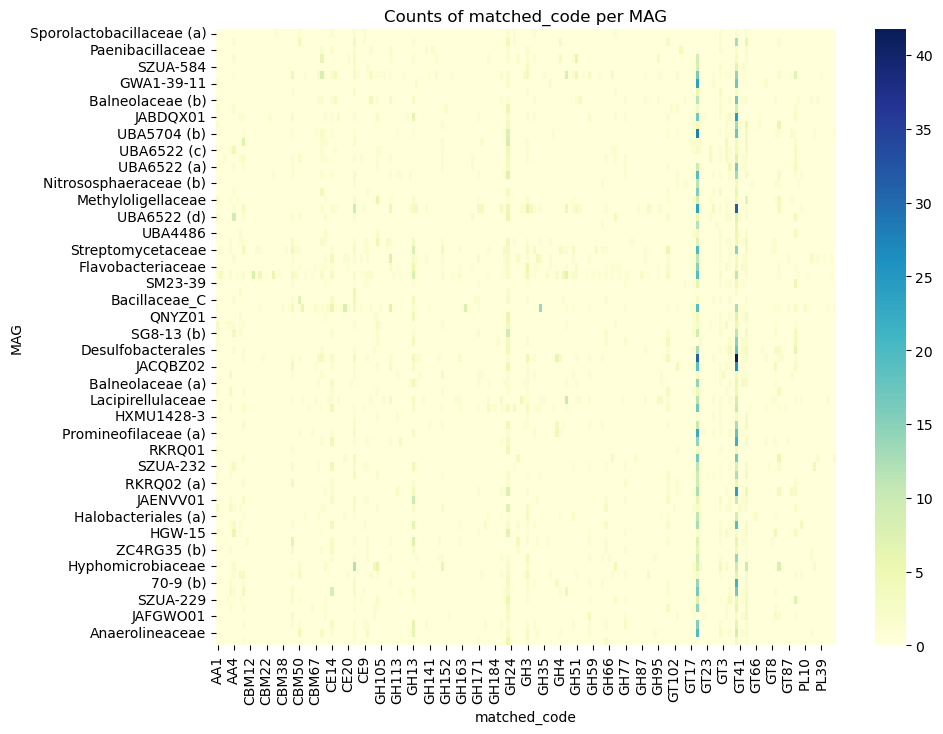

In [17]:
# Step 2: Reorder the DataFrame to match the specified order
heatmap_data_ordered = normalized_CAZy_data.reindex(order)

# Step 3: Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap
sns.heatmap(heatmap_data_ordered, cmap="YlGnBu", annot=False, fmt="d")

# Step 4: Add labels and title
plt.title('Counts of matched_code per MAG')
plt.xlabel('matched_code')
plt.ylabel('MAG')

# Display the heatmap
plt.show()

/tmp/ipykernel_1696271/3830903773.py:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  heatmap_data_grouped = heatmap_data_copy.groupby(heatmap_data_copy.columns, axis=1).sum()


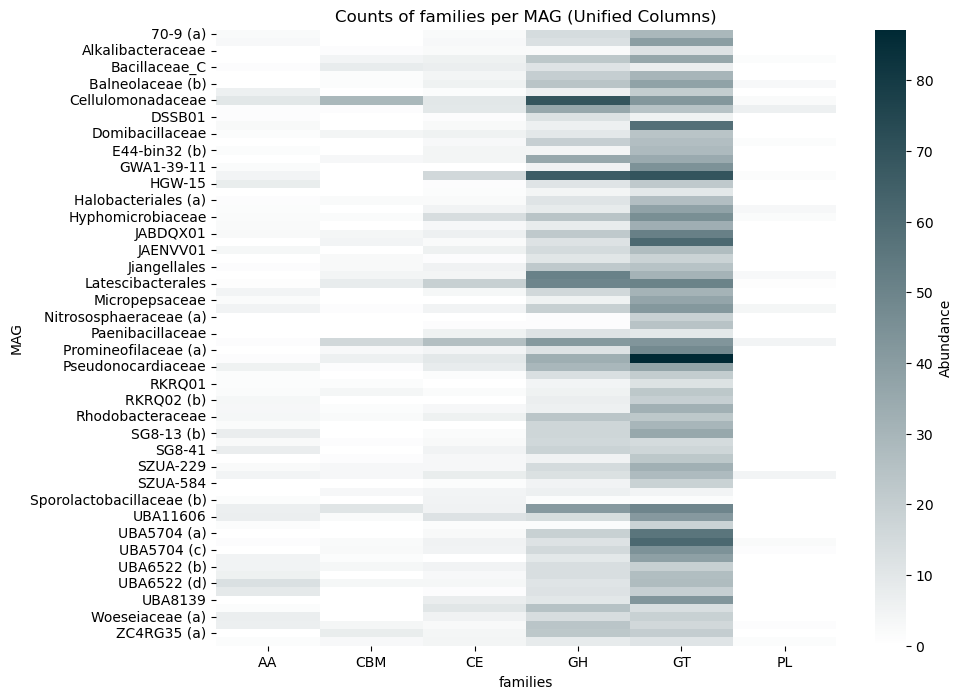

In [18]:

from matplotlib.colors import LinearSegmentedColormap

# Step 1: Create a copy of the heatmap_data with columns simplified by removing numbers
heatmap_data_copy = normalized_CAZy_data.copy()
heatmap_data_copy.columns = heatmap_data_copy.columns.str.replace(r'\d+', '', regex=True)

# Step 2: Group the columns by their new names (after removing numbers) and take the sum of the values
heatmap_data_grouped = heatmap_data_copy.groupby(heatmap_data_copy.columns, axis=1).sum()

# Step 3: Create a custom color map from white to #002934
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['white', '#002934'])

# Step 4: Plot the heatmap with the unified column names
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_grouped, cmap=custom_cmap, annot=False, cbar_kws={'label': 'Abundance'})

# Step 5: Add labels and title
plt.title('Counts of families per MAG (Unified Columns)')
plt.xlabel('families')
plt.ylabel('MAG')

# Display the heatmap
plt.show()

In [19]:
p_values = []

M = normalized_CAZy_data.sum().sum()
for MAG in normalized_CAZy_data.index:
    n = normalized_CAZy_data.loc[MAG].sum()
    for cat in normalized_CAZy_data.columns:
        N = normalized_CAZy_data[cat].sum()
        k = normalized_CAZy_data.loc[MAG, cat]
        # Convert to integers
        M_int = int(M)
        n_int = int(n)
        N_int = int(N)
        k_int = int(k)
        # Print values to debug
        print(f"MAG: {MAG}, Pathway: {cat}, k: {k_int}, M: {M_int}, n: {n_int}, N: {N_int}")
        if N_int > 0 and n_int > 0 and k_int >= 0 and k_int <= N_int:
            p = hypergeom.sf(k_int, M_int, n_int, N_int)
        else:
            p = np.nan
        print(f"p-value: {p}")
        p_values.append([MAG, cat, p])

# Convert to DataFrame for easier analysis
p_values_df = pd.DataFrame(p_values, columns=['MAG', 'Pathway', 'p_value'])

MAG: 70-9 (a), Pathway: AA1, k: 0, M: 4240, n: 47, N: 27
p-value: 0.26058464280525856
MAG: 70-9 (a), Pathway: AA10, k: 0, M: 4240, n: 47, N: 5
p-value: 0.054234343287291445
MAG: 70-9 (a), Pathway: AA12, k: 0, M: 4240, n: 47, N: 1
p-value: 0.011084905660377358
MAG: 70-9 (a), Pathway: AA2, k: 0, M: 4240, n: 47, N: 2
p-value: 0.022049522181717834
MAG: 70-9 (a), Pathway: AA3, k: 0, M: 4240, n: 47, N: 30
p-value: 0.28506197625868035
MAG: 70-9 (a), Pathway: AA4, k: 0, M: 4240, n: 47, N: 49
p-value: 0.4226613419129729
MAG: 70-9 (a), Pathway: AA5, k: 0, M: 4240, n: 47, N: 2
p-value: 0.022049522181717834
MAG: 70-9 (a), Pathway: AA6, k: 0, M: 4240, n: 47, N: 18
p-value: 0.18212684619177047
MAG: 70-9 (a), Pathway: AA7, k: 2, M: 4240, n: 47, N: 54
p-value: 0.021338699551435494
MAG: 70-9 (a), Pathway: CBM11, k: 0, M: 4240, n: 47, N: 1
p-value: 0.011084905660377358
MAG: 70-9 (a), Pathway: CBM12, k: 0, M: 4240, n: 47, N: 1
p-value: 0.011084905660377358
MAG: 70-9 (a), Pathway: CBM13, k: 0, M: 4240, n:

In [20]:
print(p_values_df)

               MAG Pathway   p_value
0         70-9 (a)     AA1  0.260585
1         70-9 (a)    AA10  0.054234
2         70-9 (a)    AA12  0.011085
3         70-9 (a)     AA2  0.022050
4         70-9 (a)     AA3  0.285062
...            ...     ...       ...
14055  ZC4RG35 (b)    PL39  0.006840
14056  ZC4RG35 (b)    PL42  0.006840
14057  ZC4RG35 (b)     PL6  0.013634
14058  ZC4RG35 (b)     PL8  0.013634
14059  ZC4RG35 (b)     PL9  0.020384

[14060 rows x 3 columns]


In [21]:
# bonferroni = 0.05/len(p_values)
# bonferroni = 0.05/11 # Species
# bonferroni = 0.05/21 # COG categories
bonferroni = 0.05/191 # COG categories

p_values_bonferroni = [i for i in p_values if i[2] < bonferroni]
p_values_bonferroni = pd.DataFrame(p_values_bonferroni, columns=['Species', 'kegg', 'p-value'])
# p_values_bonferroni.to_excel('annotation/overrepresented_cog.xlsx', sheet_name='species', index=False)
p_values_bonferroni

,Species,kegg,p-value
0,70-9 (a),GH39,3.621297e-05
1,70-9 (b),GT4,1.125205e-04
2,Anaerolineaceae,CBM50,2.037040e-04
3,Bacillaceae_C,CBM50,5.114392e-09
4,Bacillaceae_C,GH170,0.000000e+00
...,...,...,...
148,Woeseiaceae (a),GT17,0.000000e+00
149,Woeseiaceae (b),GH9,3.593447e-05
150,ZC4RG35 (a),CBM11,0.000000e+00
151,ZC4RG35 (a),CBM48,1.944298e-05


In [22]:
p_values_bonferroni.to_csv('CAZy_enriched.csv', sep=';')

Now I am going to repeat the heatmaps only with the enriched values

In [24]:
#I extracted the families enriched and search which ones participate in the degradation of any component of the lignocelulose.
#Here is the list of the result.
#For simplicity I am going to plot only these enzime families

enriched_fam_ligno =  ["GH48", "GH9", "GH8", "GH6", "GH9", "CBM2", "CBM5", "CBM6", "CBM4", "CBM51", "CE3", "GH10", "GH53", "CBM13","CBM22", "CBM32",
          "GH11", "GH42", "GH94", "CE1", "GH30", "GH26", "GH67", "CE4", "GH102", "CBM26", "CE16", "GH43", "GH76", "CE1", "CE15", "CE6",
          "GH115", "GH43", "GH51", "GH54", "GH67", "CBM38", "CE12", "CE17", "CE19", "CBM34", "CE4", "CBM16", "CE14", "CE1", "GH51", "GH26",
          "CBM35", "AA3", "AA10", "AA4", "AA5", "AA2", "AA12", "AA4", "AA4", "AA2", "AA7", "GH103", "PL11", "PL42", "PL1", "PL10"]

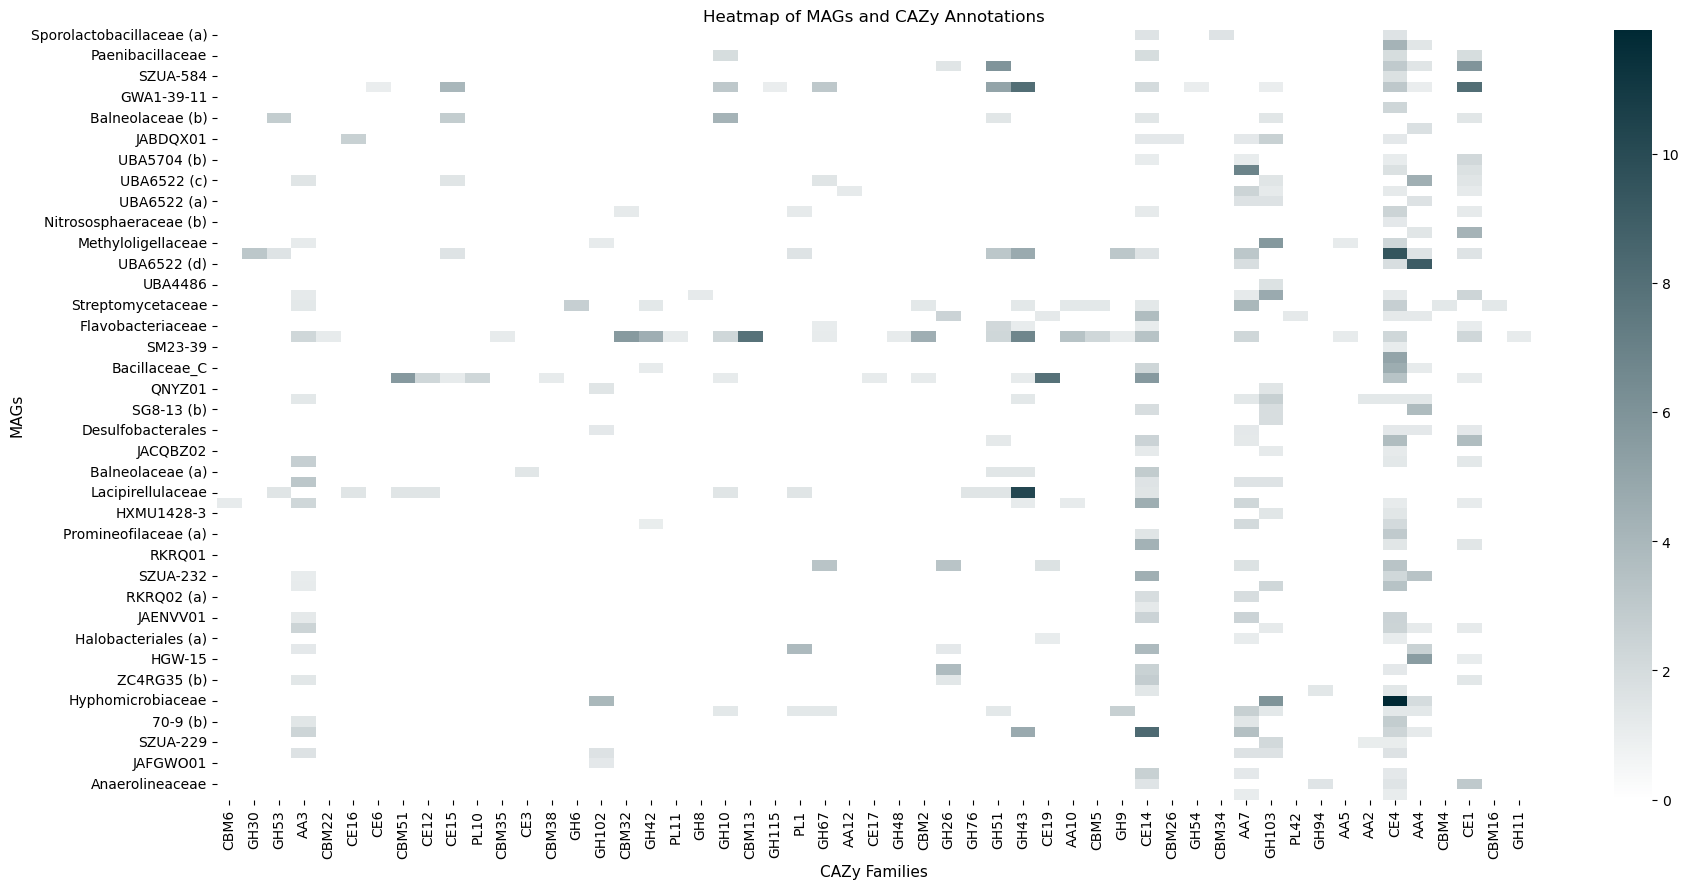

In [43]:
# Remove duplicates while keeping the original order
seen = set()
enriched_fam_ligno = [x for x in enriched_fam_ligno if not (x in seen or seen.add(x))]

# Filter and reorder the heatmap data
filtered_heatmap_data = normalized_CAZy_data.loc[:, normalized_CAZy_data.columns.intersection(enriched_fam_ligno)]
filtered_heatmap_data = filtered_heatmap_data[enriched_fam_ligno]  # Reorder columns
filtered_heatmap_data = filtered_heatmap_data.reindex(order)  # Reorder rows

# Define a grayscale colormap similar to the uploaded image
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['white', '#002934'])

# Adjust figure width dynamically based on the number of enzyme families
fig_width = max(15, len(enriched_fam_ligno) * 0.4)  # Ensures enough space for all labels

# Plot the heatmap
plt.figure(figsize=(fig_width, 10))  # Adjust width dynamically
sns.heatmap(filtered_heatmap_data, cmap=custom_cmap, annot=False, linewidths=0, cbar=True)

# Improve label visibility
plt.xticks(rotation=90, ha="center", fontsize=10)  # Rotate enzyme family names, centered
plt.yticks(rotation=0, fontsize=10)  # Keep MAG names horizontal

# Add labels and title
plt.title('Heatmap of MAGs and CAZy Annotations', fontsize=12)
plt.xlabel('CAZy Families', fontsize=11)
plt.ylabel('MAGs', fontsize=11)

# Display the heatmap
plt.show()

Now I am specifically looking for the families from the database created by Laura et al. (2020).

In [35]:
#I am searching in the KoKEGG database.

# Load the .csv file
kokegg = pd.read_csv('/hpcfs/home/ciencias_biologicas/mf.penav1/trabajo_grado/scriptspy2/kokegg_countsfixedd.csv')

# Display the first few rows of the DataFrame
print(kokegg.head())

                         MAG  ko:K11927  ko:K07390  ko:K01462  ko:K00604  \
0  Sporolactobacillaceae (a)        0.0        0.0        1.0        1.0   
1            Domibacillaceae        0.0        0.0        1.0        1.0   
2           Paenibacillaceae        0.0        0.0        1.0        1.0   
3                    UMGS416        0.0        0.0        0.0        1.0   
4                   SZUA-584        0.0        0.0        0.0        0.0   

   ko:K01783  ko:K00864  ko:K00013  ko:K06213  ko:K00784  ...  ko:K12963  \
0        2.0        0.0        0.5        0.0        0.0  ...        0.0   
1        1.0        0.0        0.0        0.0        1.0  ...        0.0   
2        0.0        0.0        0.0        0.0        0.0  ...        0.0   
3        0.0        1.0        1.0        0.0        0.0  ...        0.0   
4        0.0        0.0        0.0        0.0        0.0  ...        0.0   

   ko:K01261  ko:K18652  ko:K14331  ko:K05836  ko:K08659  ko:K14379  \
0        0.0   

In [36]:
# Load Database B (KO codes of interest)
KO_lignin = pd.read_csv('KO_lignin_transfprocess.tsv', sep='\t')

# Extract the KO IDs from Database B
ko_codes = KO_lignin['KO_ID'].tolist()

# Add the 'ko:' prefix to each KO code from Database B for matching with Database A columns
ko_codes_prefixed = ['ko:' + ko for ko in ko_codes]

# Filter Database A to check which KO columns are present in the KO codes
matching_columns = [col for col in kokegg.columns if col in ko_codes_prefixed]

# Filter rows where at least one of the KO columns has a 1.0
annotated_mags = kokegg[kokegg[matching_columns].sum(axis=1) > 0]

# Display the relevant MAGs and their annotations for the matching KO codes
print(annotated_mags[['MAG'] + matching_columns])

                          MAG  ko:K00799  ko:K00103  ko:K00001  ko:K01784  \
0   Sporolactobacillaceae (a)        0.0        0.0   0.000000        0.0   
1             Domibacillaceae        0.0        0.0   1.500000        1.0   
2            Paenibacillaceae        0.0        0.0   0.000000        0.0   
3                     UMGS416        0.0        0.0   1.000000        0.0   
4                    SZUA-584        0.0        0.0   0.000000        0.0   
..                        ...        ...        ...        ...        ...   
69                     RKSH01        3.0        0.5   0.000000        0.5   
70                   JAFGWO01        0.0        0.0   0.000000        1.0   
71               Jiangellales        0.0        1.0   0.333333        2.0   
72            Anaerolineaceae        1.0        0.0   0.000000        2.0   
73                     DSSB01        2.0        0.5   0.500000        2.0   

    ko:K01055  ko:K00560  ko:K04099  ko:K10221  ko:K00128  ...  ko:K00446  

In [37]:
print(annotated_mags.head())

                         MAG  ko:K11927  ko:K07390  ko:K01462  ko:K00604  \
0  Sporolactobacillaceae (a)        0.0        0.0        1.0        1.0   
1            Domibacillaceae        0.0        0.0        1.0        1.0   
2           Paenibacillaceae        0.0        0.0        1.0        1.0   
3                    UMGS416        0.0        0.0        0.0        1.0   
4                   SZUA-584        0.0        0.0        0.0        0.0   

   ko:K01783  ko:K00864  ko:K00013  ko:K06213  ko:K00784  ...  ko:K12963  \
0        2.0        0.0        0.5        0.0        0.0  ...        0.0   
1        1.0        0.0        0.0        0.0        1.0  ...        0.0   
2        0.0        0.0        0.0        0.0        0.0  ...        0.0   
3        0.0        1.0        1.0        0.0        0.0  ...        0.0   
4        0.0        0.0        0.0        0.0        0.0  ...        0.0   

   ko:K01261  ko:K18652  ko:K14331  ko:K05836  ko:K08659  ko:K14379  \
0        0.0   

In [38]:
# Set the MAG as the index and drop unnecessary columns if needed
heatmap_data2 = annotated_mags.set_index('MAG')[matching_columns]

# Replace MAG names with taxon names
#heatmap_data2.index = heatmap_data2.index.map(mag_to_taxon)

# Check the updated DataFrame
print(heatmap_data2.head())

                           ko:K00799  ko:K00103  ko:K00001  ko:K01784  \
MAG                                                                     
Sporolactobacillaceae (a)        0.0        0.0        0.0        0.0   
Domibacillaceae                  0.0        0.0        1.5        1.0   
Paenibacillaceae                 0.0        0.0        0.0        0.0   
UMGS416                          0.0        0.0        1.0        0.0   
SZUA-584                         0.0        0.0        0.0        0.0   

                           ko:K01055  ko:K00560  ko:K04099  ko:K10221  \
MAG                                                                     
Sporolactobacillaceae (a)        0.0        1.0        0.0        0.0   
Domibacillaceae                  0.0        0.0        0.0        0.0   
Paenibacillaceae                 0.0        0.0        0.0        0.0   
UMGS416                          0.0        0.0        0.0        0.0   
SZUA-584                         0.0        0.0   

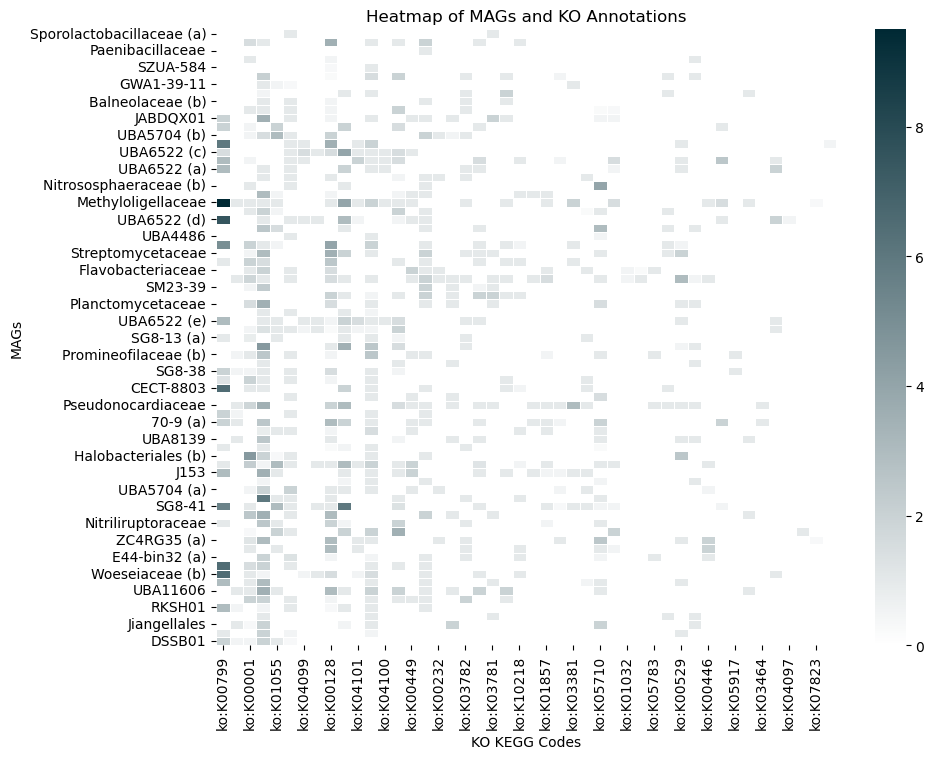

In [39]:
# Create a custom colormap from white to #002934
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#ffffff', '#002934'])

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size as needed
sns.heatmap(heatmap_data2, cmap=custom_cmap, annot=False, cbar=True, linewidths=0.5)

# Set labels
plt.title('Heatmap of MAGs and KO Annotations')
plt.xlabel('KO KEGG Codes')
plt.ylabel('MAGs')

# Show the heatmap
plt.show()

Finally the enrichent analysis

In [46]:
annotated_mags_ = annotated_mags.set_index('MAG')[matching_columns]

In [47]:
print(annotated_mags_.head())

                           ko:K00799  ko:K00103  ko:K00001  ko:K01784  \
MAG                                                                     
Sporolactobacillaceae (a)        0.0        0.0        0.0        0.0   
Domibacillaceae                  0.0        0.0        1.5        1.0   
Paenibacillaceae                 0.0        0.0        0.0        0.0   
UMGS416                          0.0        0.0        1.0        0.0   
SZUA-584                         0.0        0.0        0.0        0.0   

                           ko:K01055  ko:K00560  ko:K04099  ko:K10221  \
MAG                                                                     
Sporolactobacillaceae (a)        0.0        1.0        0.0        0.0   
Domibacillaceae                  0.0        0.0        0.0        0.0   
Paenibacillaceae                 0.0        0.0        0.0        0.0   
UMGS416                          0.0        0.0        0.0        0.0   
SZUA-584                         0.0        0.0   

In [48]:
p_values = []

M = annotated_mags_.sum().sum()
for MAG in annotated_mags_.index:
    n = annotated_mags_.loc[MAG].sum()
    for cat in annotated_mags_.columns:
        N = annotated_mags_[cat].sum()
        k = annotated_mags_.loc[MAG, cat]
        # Convert to integers
        M_int = int(M)
        n_int = int(n)
        N_int = int(N)
        k_int = int(k)
        # Print values to debug
        print(f"MAG: {MAG}, Pathway: {cat}, k: {k_int}, M: {M_int}, n: {n_int}, N: {N_int}")
        if N_int > 0 and n_int > 0 and k_int >= 0 and k_int <= N_int:
            p = hypergeom.sf(k_int, M_int, n_int, N_int)
        else:
            p = np.nan
        print(f"p-value: {p}")
        p_values.append([MAG, cat, p])

# Convert to DataFrame for easier analysis
p_values_df = pd.DataFrame(p_values, columns=['MAG', 'Pathway', 'p_value'])
print(p_values_df)

MAG: Sporolactobacillaceae (a), Pathway: ko:K00799, k: 0, M: 883, n: 2, N: 91
p-value: 0.1955994175699725
MAG: Sporolactobacillaceae (a), Pathway: ko:K00103, k: 0, M: 883, n: 2, N: 9
p-value: 0.020292601751912543
MAG: Sporolactobacillaceae (a), Pathway: ko:K00001, k: 0, M: 883, n: 2, N: 45
p-value: 0.09938290151847828
MAG: Sporolactobacillaceae (a), Pathway: ko:K01784, k: 0, M: 883, n: 2, N: 106
p-value: 0.22579949307016126
MAG: Sporolactobacillaceae (a), Pathway: ko:K01055, k: 0, M: 883, n: 2, N: 27
p-value: 0.06025377308341231
MAG: Sporolactobacillaceae (a), Pathway: ko:K00560, k: 1, M: 883, n: 2, N: 36
p-value: 0.0016178611875101116
MAG: Sporolactobacillaceae (a), Pathway: ko:K04099, k: 0, M: 883, n: 2, N: 6
p-value: 0.013551513470620408
MAG: Sporolactobacillaceae (a), Pathway: ko:K10221, k: 0, M: 883, n: 2, N: 7
p-value: 0.01580111093134876
MAG: Sporolactobacillaceae (a), Pathway: ko:K00128, k: 0, M: 883, n: 2, N: 63
p-value: 0.1376799870571105
MAG: Sporolactobacillaceae (a), Pathw

In [49]:
print(p_values_df.head())

                         MAG    Pathway   p_value
0  Sporolactobacillaceae (a)  ko:K00799  0.195599
1  Sporolactobacillaceae (a)  ko:K00103  0.020293
2  Sporolactobacillaceae (a)  ko:K00001  0.099383
3  Sporolactobacillaceae (a)  ko:K01784  0.225799
4  Sporolactobacillaceae (a)  ko:K01055  0.060254


In [50]:
# bonferroni = 0.05/len(p_values)
# bonferroni = 0.05/11 # Species
# bonferroni = 0.05/21 # COG categories
bonferroni = 0.05/60 # COG categories

p_values_bonferroni = [i for i in p_values if i[2] < bonferroni]
p_values_bonferroni = pd.DataFrame(p_values_bonferroni, columns=['Species', 'kegg', 'p-value'])
# p_values_bonferroni.to_excel('annotation/overrepresented_cog.xlsx', sheet_name='species', index=False)
p_values_bonferroni

,Species,kegg,p-value
0,Sporolactobacillaceae (a),ko:K03781,0.000200
1,Paenibacillaceae,ko:K04564,0.000000
2,UMGS416,ko:K00965,0.000141
3,SZUA-584,ko:K00297,0.000000
4,GWA1-39-11,ko:K03381,0.000116
5,Alkalibacteraceae,ko:K00432,0.000164
6,Alkalibacteraceae,ko:K00055,0.000533
7,UBA5704 (b),ko:K01055,0.000292
8,Woeseiaceae (a),ko:K00799,0.000520
9,UBA6522 (b),ko:K00450,0.000519


In [ ]:
KO_lignin = pd.read_csv('KO_lignin_transfprocess.tsv', sep='\t')

In [ ]:
KO_lignin.to_csv('KO_lignin_transfprocess.csv', sep=';')